# Proyek Analisis Data: ***E-Commerce* Public Dataset**
- Nama: Azel Rizki Nasution
- Email: azel.rizki.nasution-2021@ftmm.unair.ac.id
- Id Dicoding: azelrizkinasution

## **PERTANYAAN BISNIS**

Berdasarkan seluruh dataset yang ada, saya mendapati hal-hal yang dapat dianalisis untuk mendapatkan suatu *insight* bisnis, yang mana tentunya *insight* bisnis tersebut didasari oleh pertanyaan bisnis. Pertanyaan bisnisnya terdapat di bawah ini:

1. Berapa persentase pesanan yang berhasil dikirim pada waktunya dibandingkan dengan yang terlambat?

2. Berapa rata-rata nilai pembelian untuk setiap metode pembayaran (e.g., kartu kredit, Boleto, dll.)?

3. Produk kategori apa yang paling sering dibeli oleh pelanggan? (Pertanyaan ini dapat membantu *E-commerce* dalam merencanakan strategi pemasaran atau promosi)

4. Kota atau negara bagian mana yang memiliki tingkat ulasan negatif tertinggi? (Pertanyaan ini dapat memberi tahu kita di mana layanan pengiriman atau kualitas produk mungkin perlu ditingkatkan)

5. Bagaimana distribusi metode pembayaran yang digunakan oleh pelanggan? (Pertanyaan ini relevan untuk mengetahui preferensi pembayaran pelanggan)

6. Apa kategori produk yang paling sering diberikan ulasan positif dan negatif?

7. Bagaimana tren penjualan bulanan selama periode waktu tertentu?

8. Dalam bulan apa penjualan tertinggi dan terendah terjadi?

9. Bagaimana distribusi geografis dari pelanggan? (Pertanyaan ini akan membantu kita memahami pasar target geografis)

10. Bagaimana distribusi review dari *e-commerce* ini? (Pertanyaan ini akan membantu kita memahami bagaimana review-review yang diberikan oleh para *customer*, yang dapat menandakan kualitas produk, serta kualitas pelayanan yang terjadi di *e-commerce* ini)

11. Dari kota atau negara bagian mana penjual paling aktif mengirimkan produk?

## ***LIBRARIES***

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## ***DATA UNDERSTANDING***

In [2]:
# Datasets in the extracted directory
datasets = os.listdir('ecommerce_dataset/E-Commerce Public Dataset')

In [3]:
for data in datasets:
    if data.endswith('csv'):
        # Load the CSV file into a DataFrame
        df = pd.read_csv(os.path.join('ecommerce_dataset/E-Commerce Public Dataset', data))
        
        # Show dataframe information
        print(f'Data {data}:\n')
        print(df.info())
        print('\n' + '-'*50 + '\n')

Data customers_dataset.csv:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

--------------------------------------------------

Data geolocation_dataset.csv:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  fl

1. **customers_dataset.csv**: Dataset tentang pelanggan, termasuk ID unik pelanggan, kode pos, kota, dan negara.

2. **geolocation_dataset.csv**: Dataset tentang geolokasi yang berhubungan dengan kode pos, termasuk latitude, longitude, kota, dan negara.

3. **order_items_dataset.csv**: Dataset tentang detail item yang dipesan, seperti ID produk, ID penjual, harga, biaya pengiriman, dan kategori produk.

4. **order_payments_dataset.csv**: Dataset tentang detail pembayaran untuk setiap pesanan, termasuk metode pembayaran, jumlah cicilan, dan nilai pembayaran.

5. **order_reviews_dataset.csv**: Dataset tentang ulasan dan peringkat untuk setiap pesanan.

6. **orders_dataset.csv**: Dataset tentang informasi dasar tentang setiap pesanan, termasuk status pesanan, tanggal pemesanan, dan tanggal pengiriman.

7. **product_category_name_translation.csv**: Dataset tentang terjemahan nama kategori produk.

8. **products_dataset.csv**: Dataset tentang produk, seperti kategori, dimensi, dan berat.

9. **sellers_dataset.csv**: Dataset tentang penjual, termasuk kode pos, kota, dan negara.

## ***DATA CLEANING***

In [4]:
# Load the customers_dataset.csv
customers_df = pd.read_csv('ecommerce_dataset/E-Commerce Public Dataset/customers_dataset.csv')

# Check for missing values in the customers dataset
missing_values_customers = customers_df.isnull().sum()

# Check for duplicate rows in the customers dataset
duplicate_rows_customers = customers_df.duplicated().sum()

# Validate the uniqueness of the customer_id and customer_unique_id columns
unique_customer_ids = customers_df['customer_id'].nunique()
unique_customer_unique_ids = customers_df['customer_unique_id'].nunique()

total_rows = len(customers_df)

# Check the unique values and their frequencies in the customer_state column
state_value_counts = customers_df['customer_state'].value_counts()

# Check the unique values and their frequencies in the customer_city column (focus on least frequent cities)
city_value_counts = customers_df['customer_city'].value_counts().tail(20)

print(f'Check Missing Value Customers:\n{missing_values_customers}\n')
print(f'Check Duplicate Data Customers:\n{duplicate_rows_customers}\n')
print(f'Check Uniqueness Customers:\n{unique_customer_ids, unique_customer_unique_ids, total_rows}\n')
print(f'Check Incosistencies Customers:\n\n{state_value_counts}\n')
print(f'{city_value_counts}')


Check Missing Value Customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Check Duplicate Data Customers:
0

Check Uniqueness Customers:
(99441, 96096, 99441)

Check Incosistencies Customers:

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

customer_city
nossa senhora de lourdes            1
pedras altas                        1
mae d'agua                          1
reserva do iguacu                   1
santa rita de jacutinga             1
itutinga                            1
vila bela da santissima trindade    1
senhora dos remedios                1
no

* Diketahui dari pengecekan **customers_dataset.csv** di atas bahwa:
    1. Tidak ada *missing values* pada dataset
    2. Tidak ada data duplikat pada dataset
    3. Data atribut **customer_id** dan data atribut **customer_unique_id** memiliki properti keunikan data yang wajar dan sudah sesuai
    4. Data atribut **customer_state** sudah terlihat konsisten

    Jadinya, **customers_dataset.csv** sudah bersih.

In [5]:
# Load the geolocation_dataset.csv
geolocation_df = pd.read_csv('ecommerce_dataset/E-Commerce Public Dataset/geolocation_dataset.csv')

# Check for missing values in the geolocation dataset
missing_values_geolocation = geolocation_df.isnull().sum()

# Check for duplicate rows in the geolocation dataset
duplicate_rows_geolocation = geolocation_df.duplicated().sum()

# Remove duplicate rows from the geolocation dataset
geolocation_df.drop_duplicates(inplace=True)

# Validate the range of latitude and longitude values
lat_range = (geolocation_df['geolocation_lat'].min(), geolocation_df['geolocation_lat'].max())
lng_range = (geolocation_df['geolocation_lng'].min(), geolocation_df['geolocation_lng'].max())

# Filter rows with out-of-bounds longitude values for Brazil
out_of_bounds_longitude = geolocation_df[(geolocation_df['geolocation_lng'] < -74) | (geolocation_df['geolocation_lng'] > -35)]

# Remove rows with out-of-bounds longitude values
geolocation_df = geolocation_df[(geolocation_df['geolocation_lng'] >= -74) & (geolocation_df['geolocation_lng'] <= -35)]

# Check the unique values and their frequencies in the geolocation_state column
state_value_counts_geo = geolocation_df['geolocation_state'].value_counts()

# Check the unique values and their frequencies in the geolocation_city column (focus on least frequent cities)
city_value_counts_geo = geolocation_df['geolocation_city'].value_counts().tail(20)

print(f'Check Missing Value Geolocation:\n{missing_values_geolocation}\n')
print(f'Check Duplicate Data Geolocation:\n{duplicate_rows_geolocation}\n')
print(f'((Latitude Range), (Longitude Range)):\n{lat_range, lng_range}\n')
print(f'Check Incosistencies Geolocation:\n\n{state_value_counts_geo}\n')
print(f'{city_value_counts_geo}')

Check Missing Value Geolocation:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Check Duplicate Data Geolocation:
261831

((Latitude Range), (Longitude Range)):
((-36.6053744107061, 45.06593318269697), (-101.46676644931476, 121.10539381057764))

Check Incosistencies Geolocation:

geolocation_state
SP    285975
MG    101350
RJ     78827
RS     48092
PR     45057
SC     30191
BA     27716
GO     15601
ES     12630
CE      9540
MT      9373
DF      9080
MS      8594
PA      8546
MA      6277
PE      6195
RN      4014
PI      3592
AL      3414
TO      2977
PB      2734
SE      2653
RO      2523
AM      1986
AC      1039
AP       738
RR       568
Name: count, dtype: int64

geolocation_city
coqueiro seco              1
maceia³                    1
quixabá                    1
ibitiranga                 1
sao joao dalianca          1
divinópolis de goiás       1


* Diketahui dari pengecekan **geolocation_dataset.csv** di atas bahwa:
    1. Tidak ada *missing values* pada dataset
    2. Data-data duplikat dan data-data dengan nilai longitude yang di luar batas telah dihapus
    3. Data atribut **geolocation_state** dan data atribut **geolocation_city** sudah terlihat konsisten

    Jadinya, **geolocation_dataset.csv** sudah bersih.

In [6]:
# Load the order_items_dataset.csv
order_items_df = pd.read_csv('ecommerce_dataset/E-Commerce Public Dataset/order_items_dataset.csv')

# Check for missing values in the order_items dataset
missing_values_order_items = order_items_df.isnull().sum()

# Check for duplicate rows in the order_items dataset
duplicate_rows_order_items = order_items_df.duplicated().sum()

# Validate the range of the price and freight_value columns
price_range = (order_items_df['price'].min(), order_items_df['price'].max())
freight_value_range = (order_items_df['freight_value'].min(), order_items_df['freight_value'].max())

# Convert the shipping_limit_date column to datetime format and check for any conversion errors
try:
    order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
    date_conversion_success = True
except Exception as e:
    date_conversion_error = str(e)
    date_conversion_success = False

# If conversion is successful, check the range of dates
if date_conversion_success:
    date_range = (order_items_df['shipping_limit_date'].min(), order_items_df['shipping_limit_date'].max())
else:
    date_range = None


print(f'Check Missing Value Order Items:\n{missing_values_order_items}\n')
print(f'Check Duplicate Data Order Items:\n{duplicate_rows_order_items}\n')
print(f'((Price Range), (Freight Value Range)):\n{price_range, freight_value_range}\n')
print(f'(Date Conversion Success, (Date Range)):\n{date_conversion_success, date_range}\n')

Check Missing Value Order Items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Check Duplicate Data Order Items:
0

((Price Range), (Freight Value Range)):
((0.85, 6735.0), (0.0, 409.68))

(Date Conversion Success, (Date Range)):
(True, (Timestamp('2016-09-19 00:15:34'), Timestamp('2020-04-09 22:35:08')))



* Diketahui dari pengecekan **order_items_dataset.csv** di atas bahwa:
    1. Tidak ada *missing values* pada dataset
    2. Tidak ada data-data duplikat pada dataset
    3. Data atribut numerik **price** dan **freight_value** memiliki rentang nilai yang wajar/*make sense*
    4. Data tanggal pada atribut **shipping_limit_date** sudah valid dan memiliki range tanggal yang wajar/*make sense*

    Jadinya, **order_items_dataset.csv** sudah bersih.

In [7]:
# Load the order_payments_dataset.csv
order_payments_df = pd.read_csv("ecommerce_dataset/E-Commerce Public Dataset/order_payments_dataset.csv")

# Check for missing values in the order_payments dataset
missing_values_order_payments = order_payments_df.isnull().sum()

# Check for duplicate rows in the order_payments dataset
duplicate_rows_order_payments = order_payments_df.duplicated().sum()

# Validate the range of the payment_installments and payment_value columns
installments_range = (order_payments_df['payment_installments'].min(), order_payments_df['payment_installments'].max())
payment_value_range = (order_payments_df['payment_value'].min(), order_payments_df['payment_value'].max())

# Check the unique values and their frequencies in the payment_type column
payment_type_counts = order_payments_df['payment_type'].value_counts()

# Remove rows with 'not_defined' payment type
order_payments_df = order_payments_df[order_payments_df['payment_type'] != 'not_defined']

print(f'Check Missing Value Order Payments:\n{missing_values_order_payments}\n')
print(f'Check Duplicate Data Order Payments:\n{duplicate_rows_order_payments}\n')
print(f'((Installment Range), (Payment Value Range)):\n{installments_range, payment_value_range}\n')
print(f'Check Incosistencies Order Payments:\n\n{payment_type_counts}\n')

Check Missing Value Order Payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Check Duplicate Data Order Payments:
0

((Installment Range), (Payment Value Range)):
((0, 24), (0.0, 13664.08))

Check Incosistencies Order Payments:

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64



* Diketahui dari pengecekan **order_payments_dataset.csv** di atas bahwa:
    1. Tidak ada *missing values* pada dataset
    2. Tidak ada data-data duplikat pada dataset
    3. Data pada atribut-atribut numerik memiliki rentang nilai yang wajar/*make sense*
    4. Data yang **not_defined** pada atribut **payment_type** telah dihapus

    Jadinya, **order_payments_dataset.csv** sudah bersih.

In [8]:
# Load the order_reviews_dataset.csv
order_reviews_df = pd.read_csv("ecommerce_dataset/E-Commerce Public Dataset/order_reviews_dataset.csv")

# Check for missing values in the order_reviews dataset
missing_values_order_reviews = order_reviews_df.isnull().sum()

# Check for duplicate rows in the order_reviews dataset
duplicate_rows_order_reviews = order_reviews_df.duplicated().sum()

# Validate the range and distribution of the review_score column
review_score_counts = order_reviews_df['review_score'].value_counts().sort_index()

# Convert the review_creation_date column to datetime format and check for any conversion errors
try:
    order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
    date_conversion_success_creation = True
except Exception as e:
    date_conversion_error_creation = str(e)
    date_conversion_success_creation = False

# If conversion is successful, check the range of dates for review_creation_date
if date_conversion_success_creation:
    date_range_creation = (order_reviews_df['review_creation_date'].min(), order_reviews_df['review_creation_date'].max())
else:
    date_range_creation = None

# Convert the review_answer_timestamp column to datetime format and check for any conversion errors
try:
    order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])
    date_conversion_success_answer = True
except Exception as e:
    date_conversion_error_answer = str(e)
    date_conversion_success_answer = False

# If conversion is successful, check the range of dates for review_answer_timestamp
if date_conversion_success_answer:
    date_range_answer = (order_reviews_df['review_answer_timestamp'].min(), order_reviews_df['review_answer_timestamp'].max())
else:
    date_range_answer = None

print(f'Check Missing Value Order Reviews:\n{missing_values_order_reviews}\n')
print(f'Check Duplicate Data Order Reviews:\n{duplicate_rows_order_reviews}\n')
print(f'Check Reviews Score:\n{review_score_counts}\n')
print(f'(Date Conversion Success Creation, (Date Range Creation)):\n{date_conversion_success_creation, date_range_creation}\n')
print(f'(Date Conversion Success Answer, (Date Range Answer)):\n{date_conversion_success_answer, date_range_answer}\n')

Check Missing Value Order Reviews:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Check Duplicate Data Order Reviews:
0

Check Reviews Score:
review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

(Date Conversion Success Creation, (Date Range Creation)):
(True, (Timestamp('2016-10-02 00:00:00'), Timestamp('2018-08-31 00:00:00')))

(Date Conversion Success Answer, (Date Range Answer)):
(True, (Timestamp('2016-10-07 18:32:28'), Timestamp('2018-10-29 12:27:35')))



* Diketahui dari pengecekan **order_reviews_dataset.csv** di atas bahwa:
    1. Terdapat *missing values* pada data atribut **review_comment_title** dan **review_comment_message**, tapi *missing values* tersebut masih dapat dimaklumi/diterima karena tidak semua *review* memiliki komen atau judul yang mendetail
    2. Tidak ada data-data duplikat pada dataset
    3. Data pada atribut **review_score** memiliki rentang nilai yang wajar/*make sense*
    4. Data tanggal pada atribut **review_creation_date** dan **review_answer_timestamp** sudah valid dan memiliki rentang tanggal yang wajar

    Jadinya, **order_reviews_dataset.csv** sudah bersih.

In [9]:
# Load the orders_dataset.csv
orders_df = pd.read_csv("ecommerce_dataset/E-Commerce Public Dataset/orders_dataset.csv")

# Check for missing values in the orders dataset
missing_values_orders = orders_df.isnull().sum()

# Check for duplicate rows in the orders dataset
duplicate_rows_orders = orders_df.duplicated().sum()

# Convert the order_purchase_timestamp column to datetime format and check for any conversion errors
try:
    orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
    date_conversion_success_purchase = True
except Exception as e:
    date_conversion_error_purchase = str(e)
    date_conversion_success_purchase = False

# If conversion is successful, check the range of dates for order_purchase_timestamp
if date_conversion_success_purchase:
    date_range_purchase = (orders_df['order_purchase_timestamp'].min(), orders_df['order_purchase_timestamp'].max())
else:
    date_range_purchase = None

# Convert and validate the remaining timestamp columns

# Columns to validate
timestamp_columns = ['order_approved_at', 
                     'order_delivered_carrier_date', 
                     'order_delivered_customer_date', 
                     'order_estimated_delivery_date']

date_ranges = {}

# Convert each column to datetime format and check for valid date ranges
for column in timestamp_columns:
    try:
        orders_df[column] = pd.to_datetime(orders_df[column])
        date_ranges[column] = (orders_df[column].min(), orders_df[column].max())
    except Exception as e:
        date_ranges[column] = str(e)

# Check the unique values and their frequencies in the order_status column
order_status_counts = orders_df['order_status'].value_counts()


print(f'Check Missing Value Orders:\n{missing_values_orders}\n')
print(f'Check Duplicate Data Orders:\n{duplicate_rows_orders}\n')
print(f'(Date Conversion Success Purchase, (Date Range Purchase)):\n{date_conversion_success_purchase, date_range_purchase}\n')
print(f'Date Ranges:\n{date_ranges}\n')
print(f'Order Status:\n{order_status_counts}\n')

Check Missing Value Orders:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Check Duplicate Data Orders:
0

(Date Conversion Success Purchase, (Date Range Purchase)):
(True, (Timestamp('2016-09-04 21:15:19'), Timestamp('2018-10-17 17:30:18')))

Date Ranges:
{'order_approved_at': (Timestamp('2016-09-15 12:16:38'), Timestamp('2018-09-03 17:40:06')), 'order_delivered_carrier_date': (Timestamp('2016-10-08 10:34:01'), Timestamp('2018-09-11 19:48:28')), 'order_delivered_customer_date': (Timestamp('2016-10-11 13:46:32'), Timestamp('2018-10-17 13:22:46')), 'order_estimated_delivery_date': (Timestamp('2016-09-30 00:00:00'), Timestamp('2018-11-12 00:00:00'))}

Order Status:
order_status
delivered      96478
shipped         1107
ca

* Diketahui dari pengecekan **orders_dataset.csv** di atas bahwa:
    1. Terdapat *missing values* pada data atribut **order_approved_at**, **order_delivered_carrier_date**, dan **order_delivered_customer_date**, tapi *missing values* tersebut masih dapat dimaklumi/diterima karena ada kemungkinan bahwa beberapa pesanan/*order* belum mencapai tahap tertentu
    2. Tidak ada data-data duplikat pada dataset
    3. Seluruh atribut yang menunjukkan data tanggal memiliki data tanggal yang sudah valid dan range tanggal yang wajar/*make sense*
    4. Data atribut **order_status** memiliki data-data/nilai-nilai yang konsisten

    Jadinya, **orders_dataset.csv** sudah bersih.

In [10]:
# Load the products_dataset.csv
products_df = pd.read_csv("ecommerce_dataset/E-Commerce Public Dataset/products_dataset.csv")

# Check for missing values in the products dataset
missing_values_products = products_df.isnull().sum()

# Check for duplicate rows in the products dataset
duplicate_rows_products = products_df.duplicated().sum()

# Validate the range of the product_name_length and product_description_length columns
name_length_range = (products_df['product_name_lenght'].min(), products_df['product_name_lenght'].max())
description_length_range = (products_df['product_description_lenght'].min(), products_df['product_description_lenght'].max())

# Validate the range of the product_photos_qty, product_weight_g, product_length_cm, product_height_cm, and product_width_cm columns
photos_qty_range = (products_df['product_photos_qty'].min(), products_df['product_photos_qty'].max())
weight_range = (products_df['product_weight_g'].min(), products_df['product_weight_g'].max())
length_range = (products_df['product_length_cm'].min(), products_df['product_length_cm'].max())
height_range = (products_df['product_height_cm'].min(), products_df['product_height_cm'].max())
width_range = (products_df['product_width_cm'].min(), products_df['product_width_cm'].max())

# Check the unique values and their frequencies in the product_category_name column
product_category_counts = products_df['product_category_name'].value_counts()


print(f'Check Missing Value Products:\n{missing_values_products}\n')
print(f'Check Duplicate Data Products:\n{duplicate_rows_products}\n')
print(f'((Name Length Range), (Description Length Range)):\n{name_length_range, description_length_range}\n')
print(f'((Photos Quantity Range), (Weight Range), (Length Range), (Height Range), (Width Range)):\n{photos_qty_range, weight_range, length_range, height_range, width_range}\n')
print(f'Product Category:\n{product_category_counts}\n')

Check Missing Value Products:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Check Duplicate Data Products:
0

((Name Length Range), (Description Length Range)):
((5.0, 76.0), (4.0, 3992.0))

((Photos Quantity Range), (Weight Range), (Length Range), (Height Range), (Width Range)):
((1.0, 20.0), (0.0, 40425.0), (7.0, 105.0), (2.0, 105.0), (6.0, 118.0))

Product Category:
product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                    

* Diketahui dari pengecekan **products_dataset.csv** di atas bahwa:
    1. Terdapat *missing values* pada beberapa atribut, yang mana masih dapat dimaklumi/diterima karena tidak semua produk itu tersedia detail produknya
    2. Tidak ada data-data duplikat pada dataset
    3. Seluruh data atribut numerik yang berhubungan dengan produk memiliki rentang data atau nilai yang wajar/*make sense*
    4. Data atribut **product_category_name** memiliki data-data/nilai-nilai yang konsisten

    Jadinya, **products_dataset.csv** sudah bersih.

In [11]:
# Load the sellers_dataset.csv
sellers_df = pd.read_csv("ecommerce_dataset/E-Commerce Public Dataset/sellers_dataset.csv")

# Check for missing values in the sellers dataset
missing_values_sellers = sellers_df.isnull().sum()

# Check for duplicate rows in the sellers dataset
duplicate_rows_sellers = sellers_df.duplicated().sum()

# Check the unique values and their frequencies in the seller_state column
seller_state_counts = sellers_df['seller_state'].value_counts()

# Check the unique values and their frequencies in the seller_city column
seller_city_counts = sellers_df['seller_city'].value_counts()


print(f'Check Missing Value Sellers:\n{missing_values_sellers}\n')
print(f'Check Duplicate Data Sellers:\n{duplicate_rows_sellers}\n')
print(f'Seller State:\n{seller_state_counts}\n')
print(f'Seller City:\n{seller_city_counts}\n')

Check Missing Value Sellers:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Check Duplicate Data Sellers:
0

Seller State:
seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: count, dtype: int64

Seller City:
seller_city
sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: count, Length: 611, dtype: int64



* Diketahui dari pengecekan **sellers_dataset.csv** di atas bahwa:
    1. Tidak terdapat *missing value* pada dataset
    2. Tidak ada data-data duplikat pada dataset
    3. Data atribut **seller_state** dan **seller_city** memiliki data/nilai yang konsisten

    Jadinya, **sellers_dataset.csv** sudah bersih.

## ***DATA WRANGLING*** & ***EXPLORATORY DATA ANALYSIS***

### PERTANYAAN BISNIS 1

In [12]:
# Check if the order was delivered on time
orders_df['on_time_delivery'] = orders_df['order_delivered_customer_date'] <= orders_df['order_estimated_delivery_date']

# Calculate the percentage of orders delivered on time
on_time_percentage = orders_df['on_time_delivery'].mean() * 100

on_time_percentage

89.14733359479492

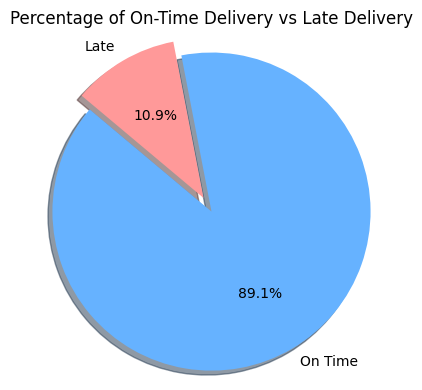

In [13]:
# Set up the figure and axes
fig = plt.figure(figsize=(4, 4))

# Plot for on-time delivery
labels = ['On Time', 'Late']
sizes = [on_time_percentage, 100 - on_time_percentage]
colors = ['#66b2ff', '#ff9999']
explode = (0.1, 0)  # explode 1st slice for emphasis

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of On-Time Delivery vs Late Delivery')

plt.tight_layout()
plt.show()

* Sekitar 89.1% pesanan yang terjadi di *e-commerce* ini dikirim tepat waktu, sedangkan sisanya 10.9% mengalami keterlambatan.

### PERTANYAAN BISNIS 2

In [14]:
# Calculate the average payment value for each payment type
avg_payment_per_type = order_payments_df.groupby('payment_type')['payment_value'].mean()

avg_payment_per_type = avg_payment_per_type.sort_values(ascending=False)


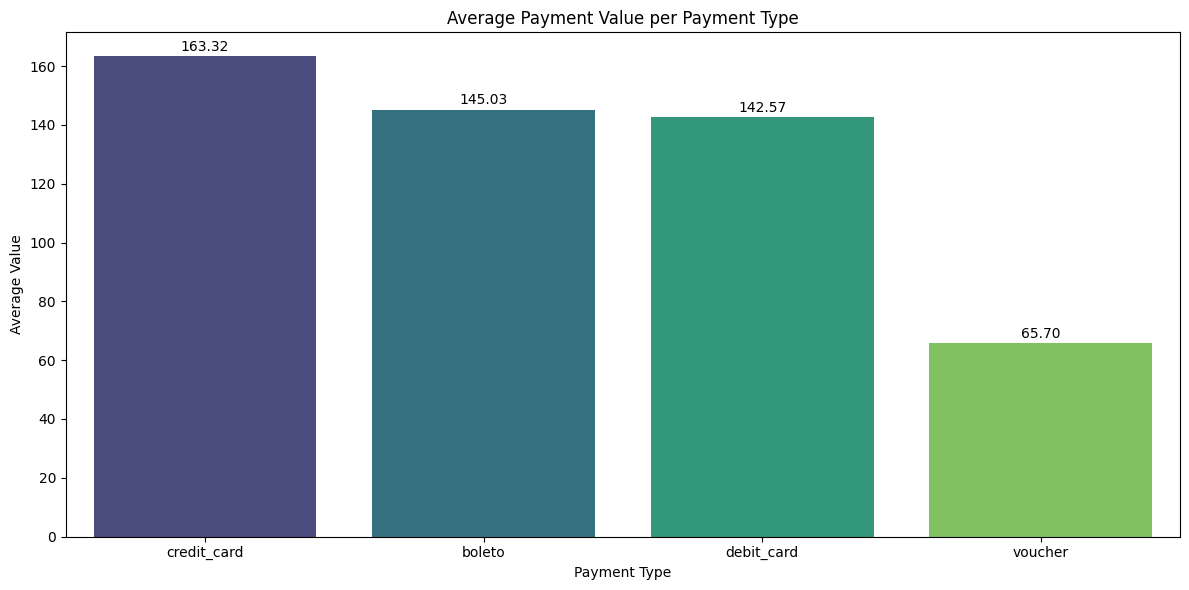

In [15]:
# Set up the figure and axes
fig = plt.figure(figsize=(12, 6))

# Plot for average payment value per type
ax = sns.barplot(x=avg_payment_per_type.index, y=avg_payment_per_type.values, palette="viridis")
plt.title('Average Payment Value per Payment Type')
plt.ylabel('Average Value')
plt.xlabel('Payment Type')

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 7), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

* Kartu kredit memiliki rata-rata nilai pembelian tertinggi, diikuti oleh metode pembayaran boleto dan kartu debit.

* Voucher memiliki rata-rata nilai pembelian yang lebih rendah dibandingkan dengan metode pembayaran lainnya.

### PERTANYAAN BISNIS 3

In [16]:
# Merge the datasets
merged_df = pd.merge(order_items_df, products_df, on='product_id', how='left')

# Count the number of products sold per category
category_counts_merged = merged_df['product_category_name'].value_counts()

category_counts_merged[:10]

product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: count, dtype: int64

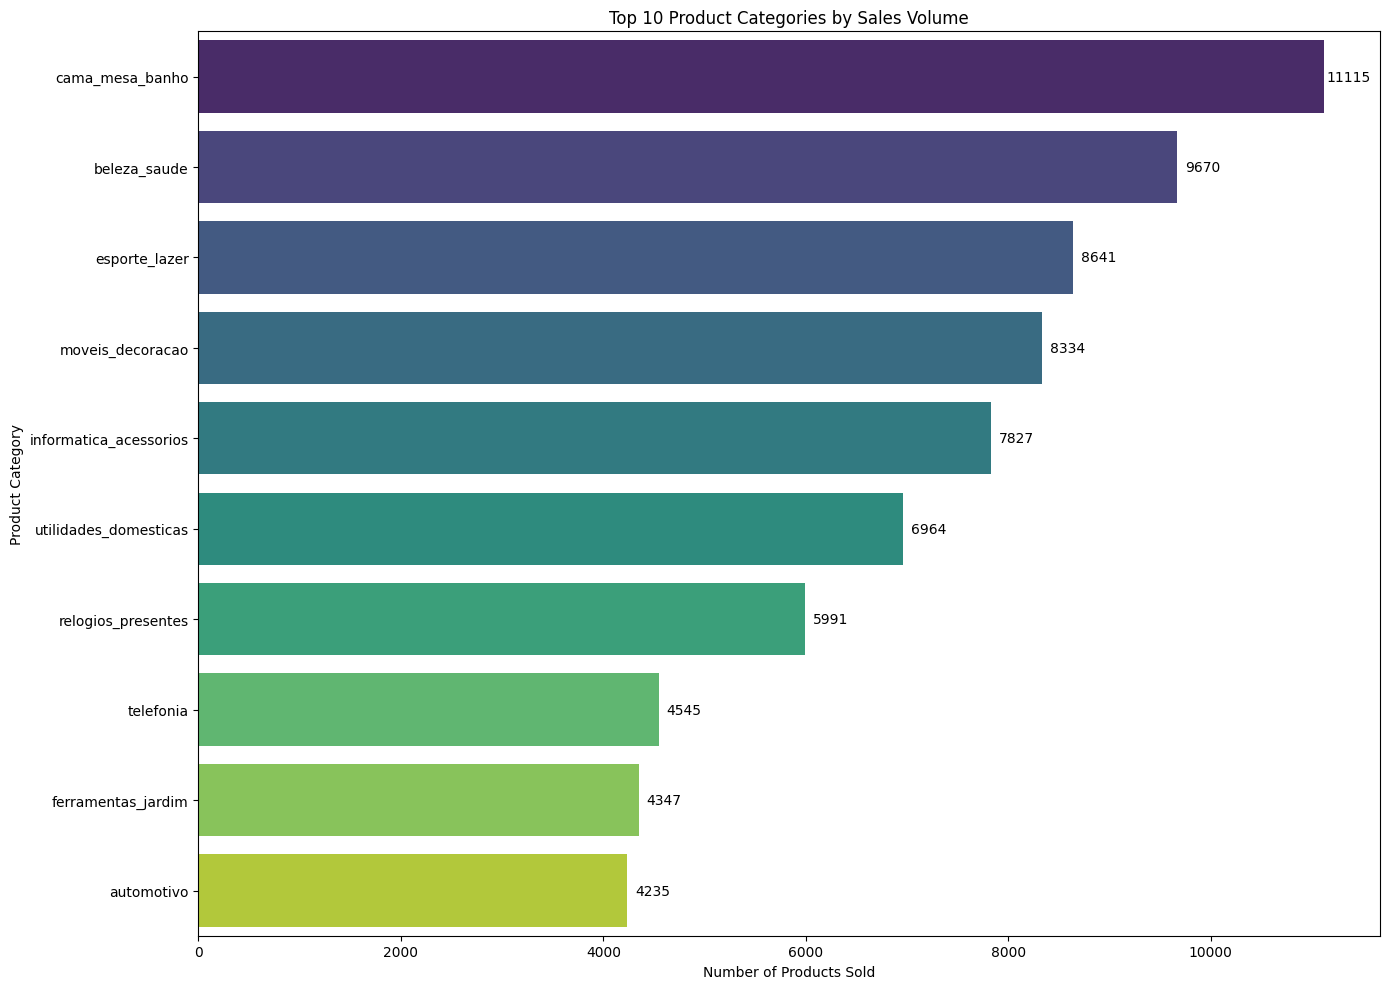

In [17]:
# Plot the top 10 categories
plt.figure(figsize=(14, 10))
ax = sns.barplot(y=category_counts_merged.index[:10], x=category_counts_merged.values[:10], palette="viridis", orient='h')
plt.title('Top 10 Product Categories by Sales Volume')
plt.xlabel('Number of Products Sold')
plt.ylabel('Product Category')

# Add labels on the right of the bars
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 250,       # set the text at 250 units right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), 
            ha = 'center', va = 'center')

plt.tight_layout()
plt.show()

* Kategori **cama_mesa_banho** memimpin dalam volume penjualan, diikuti oleh kategori seperti **beleza_saude**, **esporte_lazer**, dan lainnya, yang mana *insight* ini dapat membantu dalam merencanakan strategi pemasaran atau promosi, dengan menargetkan kategori produk yang paling populer di antara pelanggan.

### PERTANYAAN BISNIS 4

In [18]:
# Merge reviews with orders to get customer_id
merged_reviews_orders = pd.merge(order_reviews_df, orders_df, on='order_id', how='left')

# Merge the above with customers dataset to get the location details
final_merged_df = pd.merge(merged_reviews_orders, customers_df, on='customer_id', how='left')

# Consider ratings 1 and 2 as negative reviews
final_merged_df['negative_review'] = final_merged_df['review_score'].isin([1, 2])

# Group by state and calculate the percentage of negative reviews
negative_review_by_state = final_merged_df.groupby('customer_state')['negative_review'].mean().sort_values(ascending=False)

negative_review_by_state[:10]

customer_state
AL    0.239130
RR    0.239130
SE    0.217765
MA    0.217158
RJ    0.207364
CE    0.198646
PA    0.196281
BA    0.188859
PI    0.183299
PE    0.166464
Name: negative_review, dtype: float64

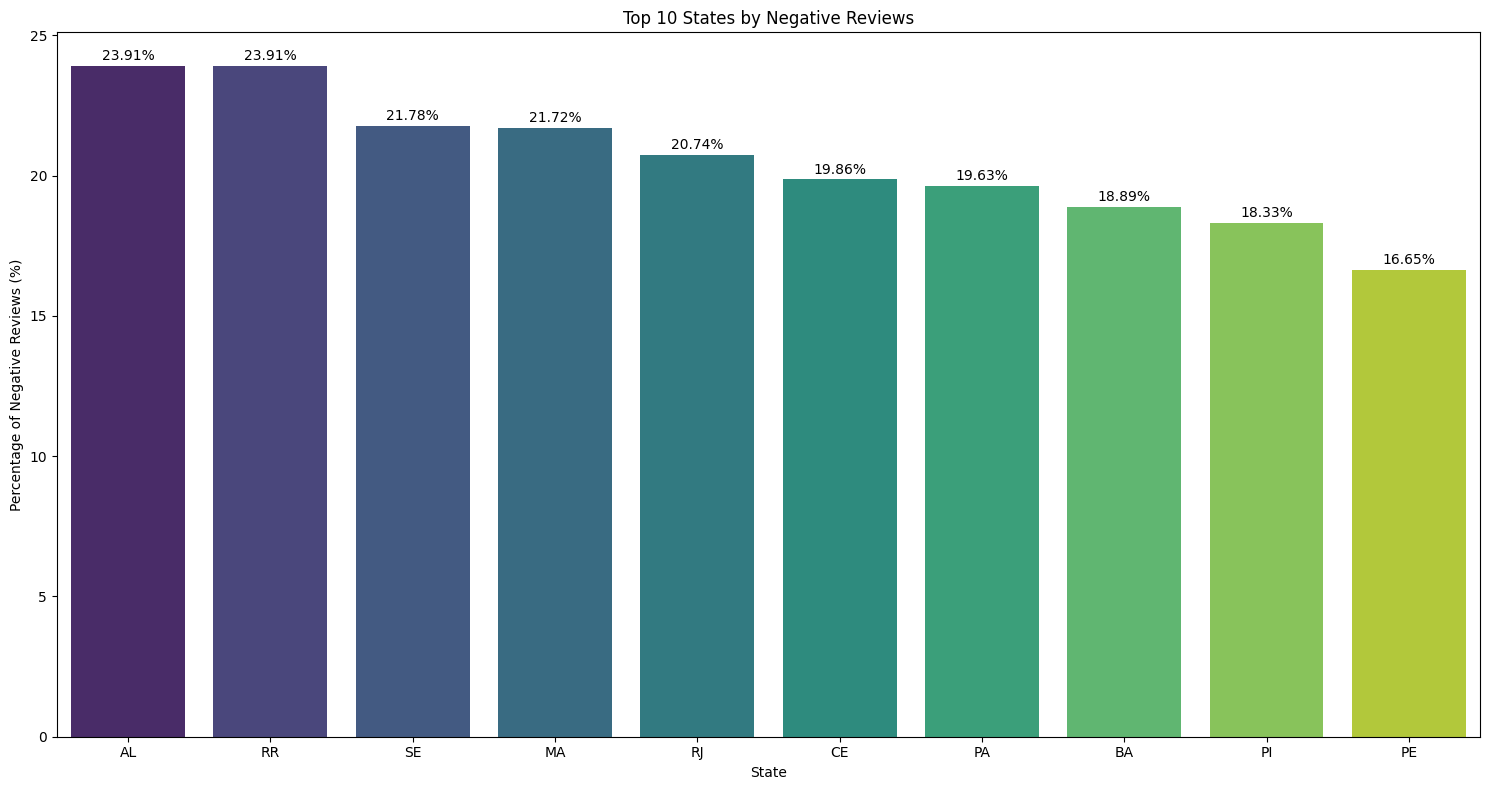

In [19]:
# Plot the Top 10 States
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=negative_review_by_state.index[:10], y=negative_review_by_state.values[:10] * 100, palette="viridis")
plt.title('Top 10 States by Negative Reviews')
plt.ylabel('Percentage of Negative Reviews (%)')
plt.xlabel('State')

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 7), 
                textcoords='offset points')
    
plt.tight_layout()
plt.show()

* Dari *bar chart* di atas, kita mengetahui 10 negara bagian dengan persentase ulasan negatif tertinggi dibandingkan dengan negara bagian lain, yang mana *insight* ini menunjukkan adanya masalah dengan layanan pengiriman atau kualitas produk di wilayah-wilayah tertentu, yang mengakibatkan tingginya ulasan negatif.

### PERTANYAAN BISNIS 5

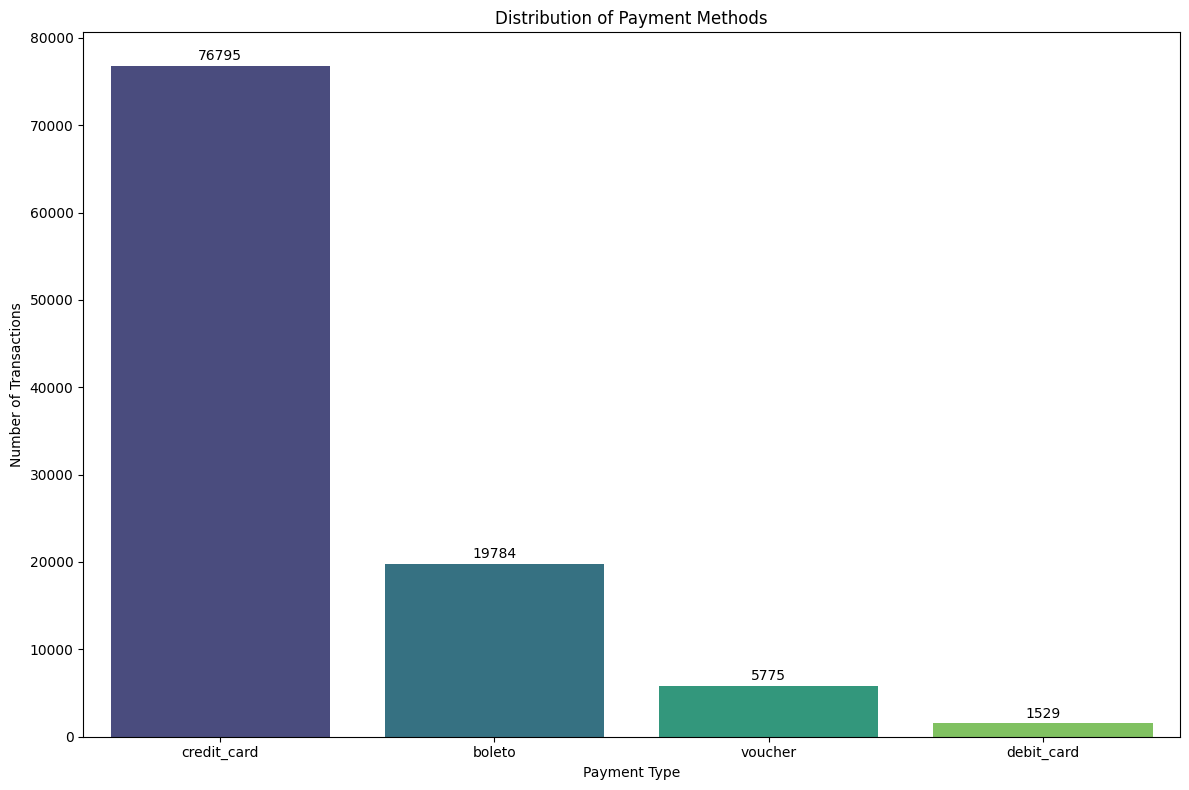

In [20]:
# Count the number of transactions for each payment type
payment_type_counts = order_payments_df['payment_type'].value_counts()

# Plot the Distribution
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette="viridis")
plt.title('Distribution of Payment Methods')
plt.ylabel('Number of Transactions')
plt.xlabel('Payment Type')

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 7), 
                textcoords='offset points')

plt.tight_layout()
plt.show()


* Kartu Kredit (**credit_card**) adalah metode pembayaran yang paling populer di antara pelanggan, dengan jumlah transaksi terbanyak.

* Metode pembayaran seperti **boleto** dan **voucher** juga digunakan cukup sering, meskipun tidak sepopuler kartu kredit.

* Kartu Debit (**debit_card**) memiliki jumlah transaksi yang lebih sedikit dibandingkan dengan metode lainnya.

### PERTANYAAN BISNIS 6

In [21]:
# Define positive and negative reviews
final_merged_df['positive_review'] = final_merged_df['review_score'].isin([4, 5])

# Merge with the previously merged dataset to get the product category names
final_merged_with_category_df = pd.merge(final_merged_df, order_items_df[['order_id', 'product_id']], on='order_id', how='left')
final_merged_with_category_df = pd.merge(final_merged_with_category_df, products_df[['product_id', 'product_category_name']], on='product_id', how='left')

# Group by product category and calculate the percentage of positive and negative reviews
positive_review_by_category = final_merged_with_category_df.groupby('product_category_name')['positive_review'].mean().sort_values(ascending=False)
negative_review_by_category = final_merged_with_category_df.groupby('product_category_name')['negative_review'].mean().sort_values(ascending=False)

positive_review_by_category[:10]

product_category_name
cds_dvds_musicais                     0.928571
construcao_ferramentas_ferramentas    0.909091
livros_interesse_geral                0.877960
fashion_roupa_infanto_juvenil         0.875000
flores                                0.870968
livros_tecnicos                       0.853383
livros_importados                     0.850000
portateis_casa_forno_e_cafe           0.842105
fashion_esporte                       0.838710
malas_acessorios                      0.837316
Name: positive_review, dtype: float64

In [22]:
negative_review_by_category[:10]

product_category_name
seguros_e_servicos                               0.500000
pc_gamer                                         0.333333
portateis_cozinha_e_preparadores_de_alimentos    0.333333
fashion_roupa_masculina                          0.282443
moveis_escritorio                                0.260818
casa_conforto_2                                  0.259259
fraldas_higiene                                  0.256410
telefonia_fixa                                   0.255725
artigos_de_festas                                0.232558
la_cuisine                                       0.230769
Name: negative_review, dtype: float64

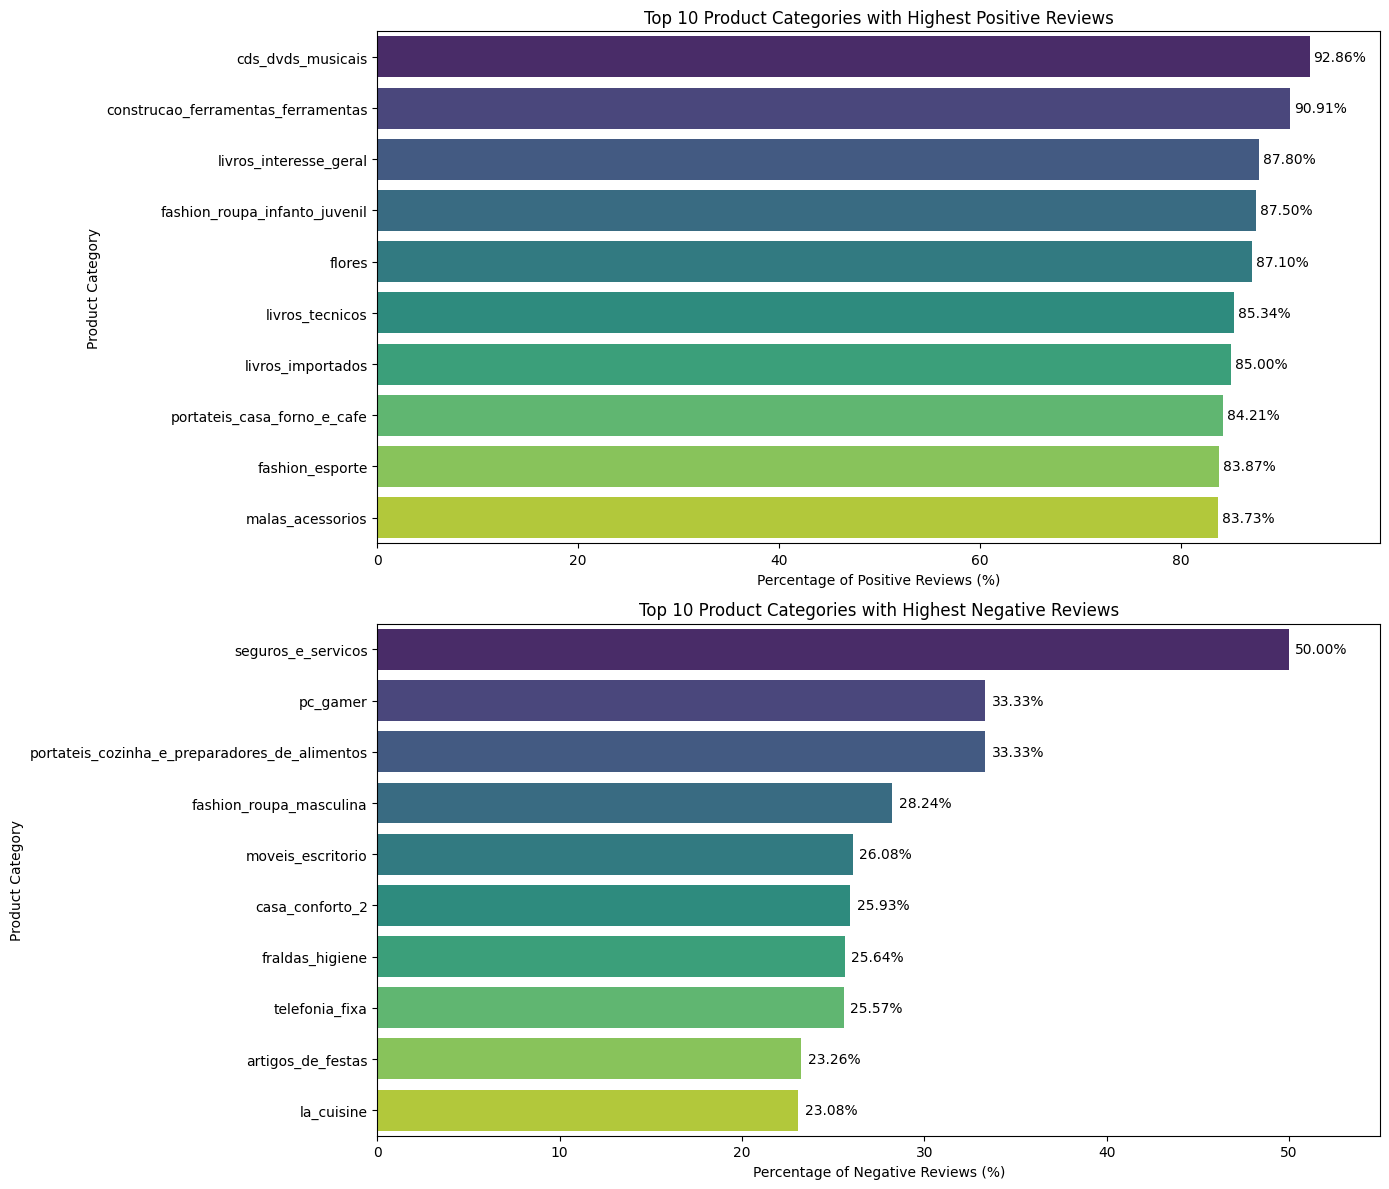

In [23]:
# Plot the top 10 categories with highest positive reviews
plt.figure(figsize=(14, 12))

# First subplot for positive reviews
plt.subplot(2, 1, 1)
ax1 = sns.barplot(y=positive_review_by_category.index[:10], x=positive_review_by_category.values[:10] * 100, palette="viridis", orient='h')
plt.title('Top 10 Product Categories with Highest Positive Reviews')
plt.xlabel('Percentage of Positive Reviews (%)')
plt.ylabel('Product Category')
ax1.set_xlim(0, max(positive_review_by_category.values[:10] * 100) + 7)  # Add some space for the labels

# Add labels on the right of the bars for positive reviews
for p in ax1.patches:
    width = p.get_width()    # get bar length
    ax1.text(width + 3,       # set the text at 3 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:.2f}%'.format(width), 
            ha = 'center', va = 'center')

# Second subplot for negative reviews
plt.subplot(2, 1, 2)
ax2 = sns.barplot(y=negative_review_by_category.index[:10], x=negative_review_by_category.values[:10] * 100, palette="viridis", orient='h')
plt.title('Top 10 Product Categories with Highest Negative Reviews')
plt.xlabel('Percentage of Negative Reviews (%)')
plt.ylabel('Product Category')
ax2.set_xlim(0, max(negative_review_by_category.values[:10] * 100) + 5)  # Add some space for the labels

# Add labels on the right of the bars for negative reviews
for p in ax2.patches:
    width = p.get_width()    # get bar length
    ax2.text(width + 1.8,       # set the text at 1.8 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:.2f}%'.format(width), 
            ha = 'center', va = 'center')

plt.tight_layout()
plt.show()


* Dari 2 *bar chart* di atas, diketahui terdapat 10 kategori produk dengan persentase review positif tertinggi dan 10 kategori produk dengan persentase review negatif tertinggi. *Insight* ini menunjukkan bahwa 10 kategori produk dengan persentase review positif, produk-produk dijual dari 10 kategori tersebut adalah produk-produk yang bagus, berkualitas, dan *fresh*. Sebaliknya, 10 kategori produk dengan persentase review negatif tertinggi menunjukkan bahwa produk-produk dijual dari 10 kategori tersebut adalah produk-produk yang sering mengalami kerusakan, produk yang lama (sudah tidak layak pakai), dan bisa saja yang awalnya produknya bagus dan aman, tetapi saat sampai di tempat *customer*, produknya malah terjadi kerusakan/kecacatan yang akhirnya *customer* memberikan *review* negatif untuk kategori produk yang merujuk pada produk tersebut.

* *Insight* tersebut juga berguna untuk *customer* dalam menentukan kategori produk yang akan dipilih sebelum membeli produk tertentu, dan juga berguna untuk *e-commerce* tersebut dalam mengevaluasi dan menganalisis mengapa 10 kategori produk tersebut memiliki persentase review negatif tertinggi.

### PERTANYAAN BISNIS 7

In [24]:
# Extract month-year
orders_df['month_year'] = orders_df['order_purchase_timestamp'].dt.to_period('M')

# Filter data for the period 2016 to 2018
filtered_orders = orders_df[orders_df['order_purchase_timestamp'].dt.year.isin([2016, 2017, 2018])]

# Group by month_year and count the number of orders
monthly_sales = filtered_orders.groupby('month_year').size()
monthly_sales

month_year
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, dtype: int64

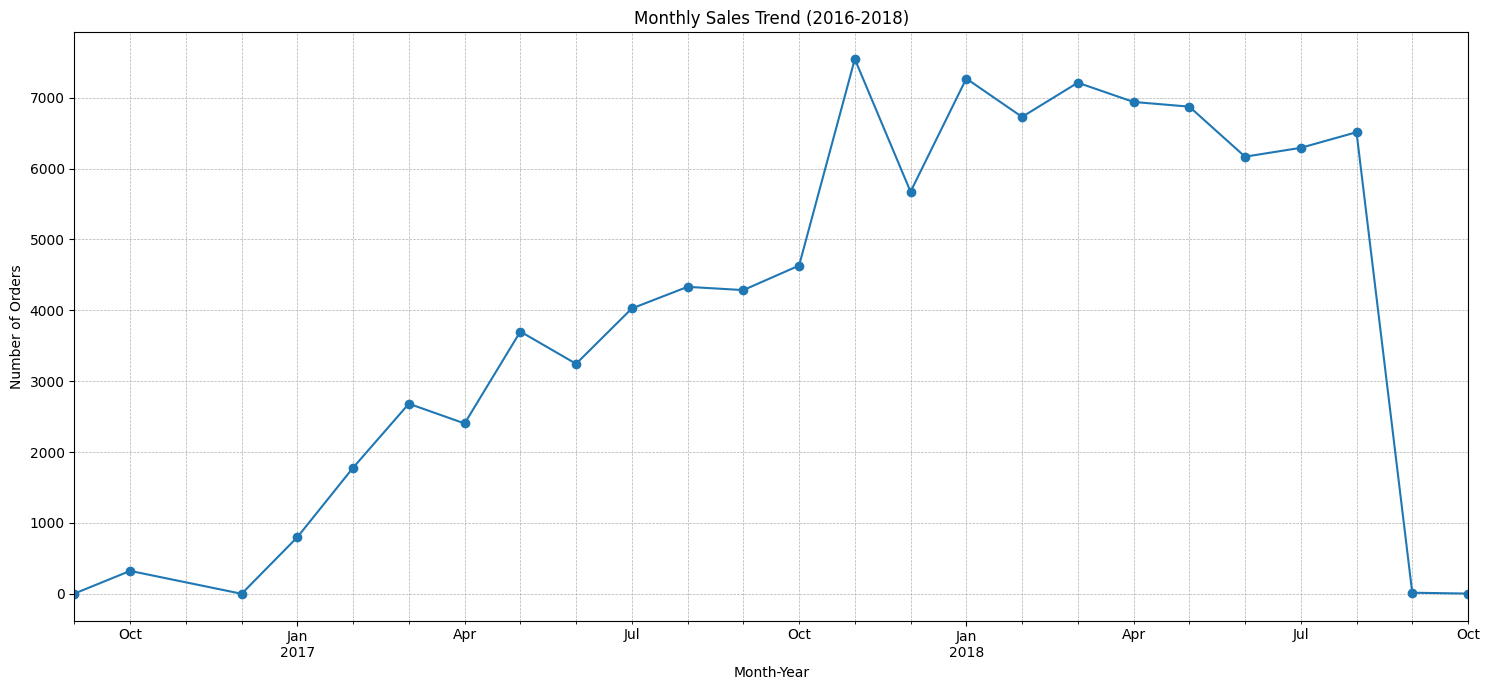

In [25]:
# Plot the Trend Line
plt.figure(figsize=(15, 7))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend (2016-2018)')
plt.ylabel('Number of Orders')
plt.xlabel('Month-Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

* Tren penjualan menunjukkan pertumbuhan yang konsisten dari November 2016 hingga akhir 2017, dengan puncaknya pada November 2017. Ini ada kemungkinan disebabkan oleh musim belanja liburan atau promosi khusus yang dilakukan oleh *e-commerce*.

* Setelah mencapai puncak pada November 2017, terjadi penurunan penjualan pada Desember 2017 dan Januari 2018, kemudian stabil selama sisa tahun 2018.

* Meskipun terdapat beberapa fluktuasi, tren penjualan secara keseluruhan tampak positif selama periode 2016-2018.

### PERTANYAAN BISNIS 8

In [26]:
# Identify the month with highest and lowest sales
highest_sales_month = monthly_sales.idxmax()
lowest_sales_month = monthly_sales.idxmin()

highest_sales_value = monthly_sales.max()
lowest_sales_value = monthly_sales.min()

highest_sales_month, highest_sales_value, lowest_sales_month, lowest_sales_value

(Period('2017-11', 'M'), 7544, Period('2016-12', 'M'), 1)

* Bulan dengan penjualan **tertinggi** adalah **November 2017** dengan total 7544 pesanan.

* Sementara bulan dengan penjualan **terendah** adalah **Desember 2016** dengan hanya 1 pesanan.

### PERTANYAAN BISNIS 9

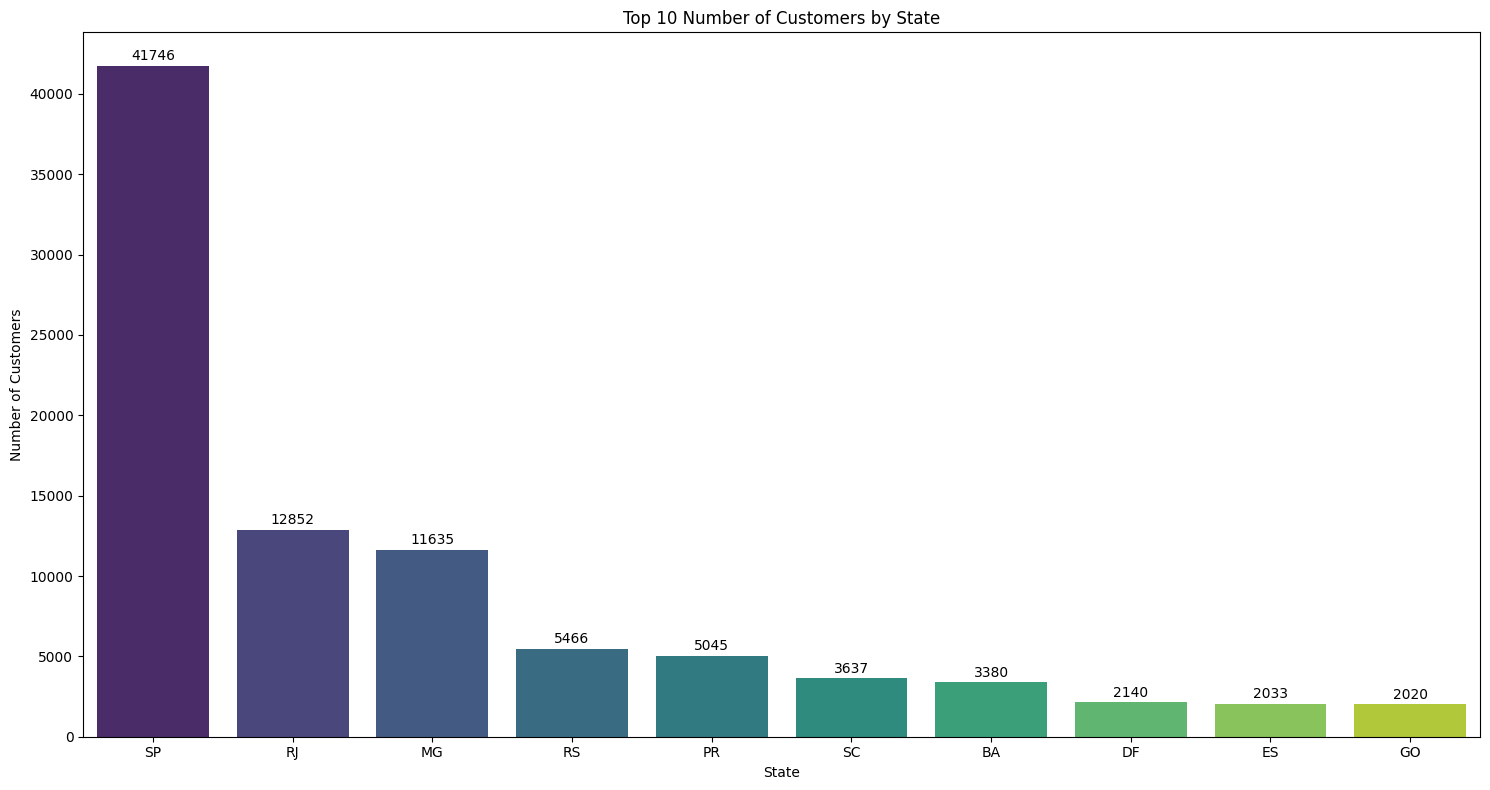

In [27]:
# Count the number of customers by state
customers_by_state = customers_df['customer_state'].value_counts()

# Plot the Distribution
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=customers_by_state.index[:10], y=customers_by_state.values[:10], palette="viridis")
plt.title('Top 10 Number of Customers by State')
plt.ylabel('Number of Customers')
plt.xlabel('State')

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 7), 
                textcoords='offset points')

plt.tight_layout()
plt.show()


* Negara bagian Sao Paulo (**SP**) memiliki jumlah pelanggan terbanyak, jauh melebihi negara bagian lainnya. Ini mungkin mengindikasikan bahwa Sao Paulo adalah pusat perdagangan dan memiliki populasi yang tinggi.

* Negara bagian seperti Rio De Janeiro (**RJ**), Minas Gerais (**MG**), dan Rio Grande do Sul (**RS**) juga memiliki jumlah pelanggan yang signifikan, tetapi tidak sebanyak Sao Paulo.

* Beberapa negara bagian memiliki jumlah pelanggan yang relatif lebih rendah.

### PERTANYAAN BISNIS 10

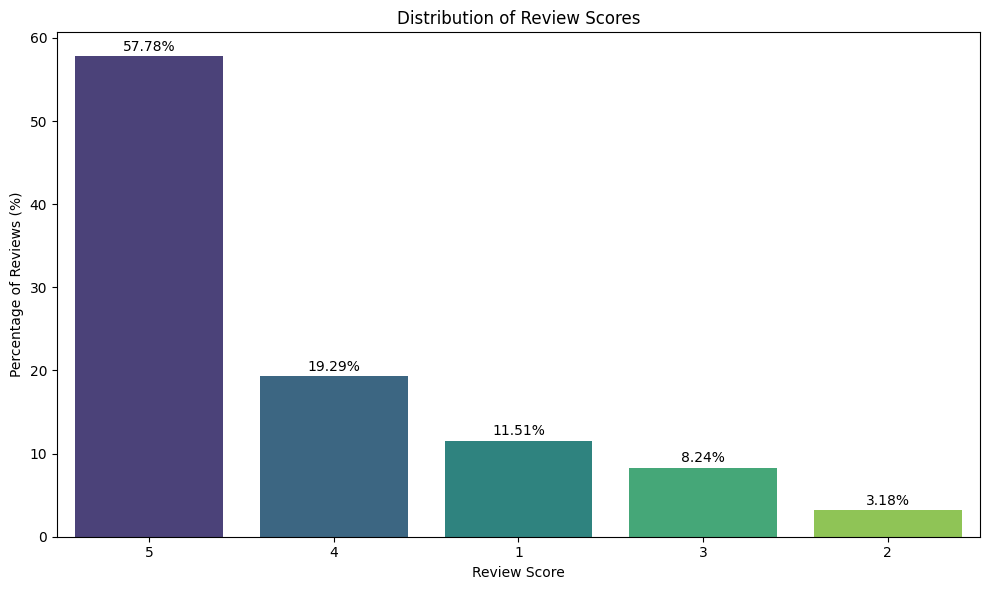

In [28]:
# Plotting the distribution of review scores
review_scores_distribution = order_reviews_df['review_score'].value_counts(normalize=True) * 100
review_scores_distribution = review_scores_distribution.sort_values(ascending=False)

# Plot the Distribution of Review Scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=review_scores_distribution.index, y=review_scores_distribution.values, palette="viridis", order=review_scores_distribution.index)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Percentage of Reviews (%)')

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 7), 
                textcoords='offset points')

plt.tight_layout()
plt.show()


* Sebagian besar *review* yang diberikan oleh para *customer* pada keseluruhan pesanan di *e-commerce* ini adalah *review* positif, yang mana *review score* 5 ada sekitar 57.78% dan *review score* 4 ada sekitar 19.29%.

### PERTANYAAN BISNIS 11

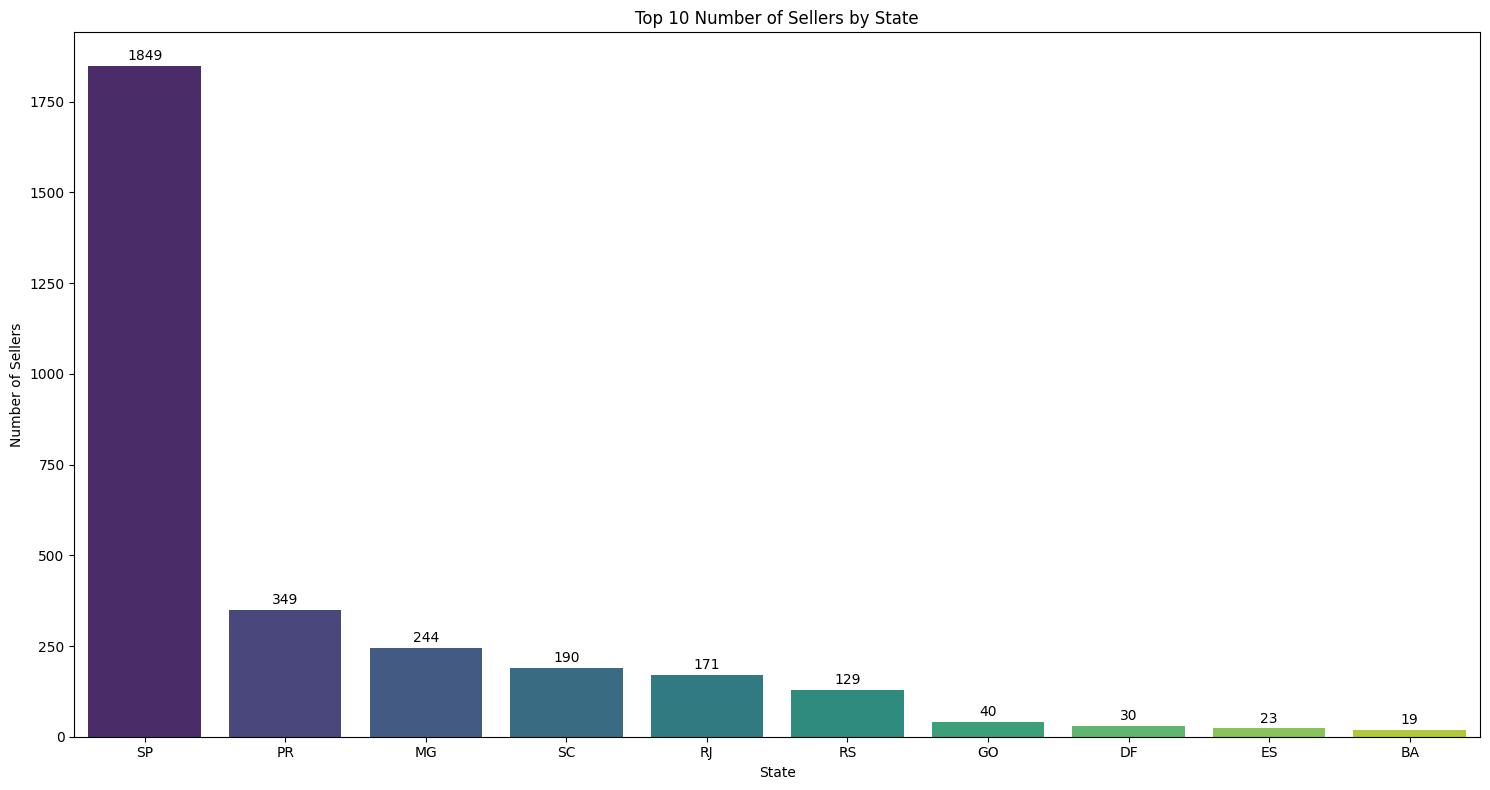

In [29]:
# Count the number of sellers by state
sellers_by_state = sellers_df['seller_state'].value_counts()

# Plot the Distribution
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=sellers_by_state.index[:10], y=sellers_by_state.values[:10], palette="viridis")
plt.title('Top 10 Number of Sellers by State')
plt.ylabel('Number of Sellers')
plt.xlabel('State')

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 7), 
                textcoords='offset points')

plt.tight_layout()
plt.show()


* Sama seperti distribusi pelanggan, negara bagian Sao Paulo (**SP**) juga mendominasi dalam hal jumlah penjual, dengan jumlah penjual yang jauh melebihi negara bagian lainnya.

* Negara bagian lain seperti Parana (**PR**) dan Minas Gerais (**MG**) memiliki jumlah penjual yang signifikan, tetapi tidak sebanyak Sao Paulo.

* Beberapa negara bagian memiliki jumlah penjual yang relatif lebih rendah.

*Insight* ini menunjukkan bahwa Sao Paulo merupakan pusat *e-commerce* di negara tersebut, dengan sebagian besar aktivitas penjualan dan pembelian terjadi di sana.

## **RFM** ***Analysis***

RFM *Analysis* pada dataset ini dapat digunakan untuk mengidentifikasi segmen *customer* yang berbeda berdasarkan perilaku pembelian mereka. RFM *Analysis* yang dilakukan adalah sebagai berikut:

* **Recency (R)**: Berapa lama sejak pelanggan terakhir melakukan pembelian?

* **Frequency (F)**: Berapa kali pelanggan telah melakukan pembelian dalam periode tertentu?

* **Monetary (M)**: Berapa total uang yang dihabiskan oleh pelanggan?

In [30]:
# Calculate Recency, Frequency, and Monetary values for each customer

# For Recency, we'll consider the most recent order date for each customer
recency_df = orders_df.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()
recency_df['Recency'] = (recency_df['order_purchase_timestamp'].max() - recency_df['order_purchase_timestamp']).dt.days
recency_df = recency_df[['customer_id', 'Recency']]

# For Frequency, we'll count the number of orders for each customer
frequency_df = orders_df.groupby('customer_id')['order_id'].count().reset_index()
frequency_df.columns = ['customer_id', 'Frequency']

# For Monetary, we'll sum the payment value for each customer
monetary_df = order_payments_df.groupby('order_id')['payment_value'].sum().reset_index()
monetary_df = pd.merge(monetary_df, orders_df[['order_id', 'customer_id']], on='order_id', how='left')
monetary_df = monetary_df.groupby('customer_id')['payment_value'].sum().reset_index()
monetary_df.columns = ['customer_id', 'Monetary']

# Merge the three dataframes
rfm_df = pd.merge(recency_df, frequency_df, on='customer_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_id')

# Show the resulting dataframe
rfm_df


,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,337,1,114.74
1,000161a058600d5901f007fab4c27140,458,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,596,1,195.42
3,0002414f95344307404f0ace7a26f1d5,427,1,179.35
4,000379cdec625522490c315e70c7a9fb,198,1,107.01
...,...,...,...,...
99432,fffecc9f79fd8c764f843e9951b11341,202,1,81.36
99433,fffeda5b6d849fbd39689bb92087f431,148,1,63.13
99434,ffff42319e9b2d713724ae527742af25,126,1,214.13
99435,ffffa3172527f765de70084a7e53aae8,410,1,45.50


Hasil RFM *Analysis* untuk tiap *customer* menunjukkan bahwa:

* **Recency**: Menunjukkan berapa hari yang telah berlalu sejak pelanggan terakhir kali melakukan pembelian. Semakin rendah nilai *Recency*, semakin baru pembelian pelanggan, yang mengindikasikan pelanggan tersebut masih aktif.

* **Frequency**: Menunjukkan berapa kali pelanggan telah melakukan pembelian. Semakin tinggi nilai *Frequency*, semakin sering pelanggan tersebut melakukan pembelian.

* **Monetary**: Menunjukkan total uang yang dihabiskan oleh pelanggan. Semakin tinggi nilai *Monetary*, semakin besar jumlah uang yang dihabiskan oleh pelanggan.

Dengan *insight* di atas, kita dapat melakukan segmentasi lebih lanjut untuk mengidentifikasi segmen pelanggan yang berbeda, seperti pelanggan yang paling loyal, pelanggan yang sering beli, dan pelanggan yang menghabiskan paling banyak uang di *e-commerce*. 

Kita akan menggunakan kuantil untuk membagi setiap kolom menjadi segmen (misalnya, Q1, Q2, Q3, Q4) dan kemudian memberi skor berdasarkan kuartil tersebut.

In [31]:
# Assigning scores for Recency, Frequency, and Monetary using quantiles

# Recency: Lower the recency, higher the score
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=4, labels=[4, 3, 2, 1])

# Assign scores for Frequency based on its unique values
rfm_df['F_Score'] = 1
rfm_df.loc[rfm_df['Frequency'] > 1, 'F_Score'] = 2
rfm_df.loc[rfm_df['Frequency'] > 2, 'F_Score'] = 3
rfm_df.loc[rfm_df['Frequency'] > 3, 'F_Score'] = 4

# Assign scores for Monetary using quantiles
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], q=4, labels=[1, 2, 3, 4])

# Recalculate RFM Group and RFM Score
rfm_df['RFM_Group'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)
rfm_df['RFM_Score'] = rfm_df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

# Show the resulting dataframe
rfm_df


,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Group,RFM_Score
0,00012a2ce6f8dcda20d059ce98491703,337,1,114.74,2,1,3,213,6
1,000161a058600d5901f007fab4c27140,458,1,67.41,1,1,2,112,4
2,0001fd6190edaaf884bcaf3d49edf079,596,1,195.42,1,1,4,114,6
3,0002414f95344307404f0ace7a26f1d5,427,1,179.35,1,1,4,114,6
4,000379cdec625522490c315e70c7a9fb,198,1,107.01,3,1,3,313,7
...,...,...,...,...,...,...,...,...,...
99432,fffecc9f79fd8c764f843e9951b11341,202,1,81.36,3,1,2,312,6
99433,fffeda5b6d849fbd39689bb92087f431,148,1,63.13,4,1,2,412,7
99434,ffff42319e9b2d713724ae527742af25,126,1,214.13,4,1,4,414,9
99435,ffffa3172527f765de70084a7e53aae8,410,1,45.50,1,1,1,111,3


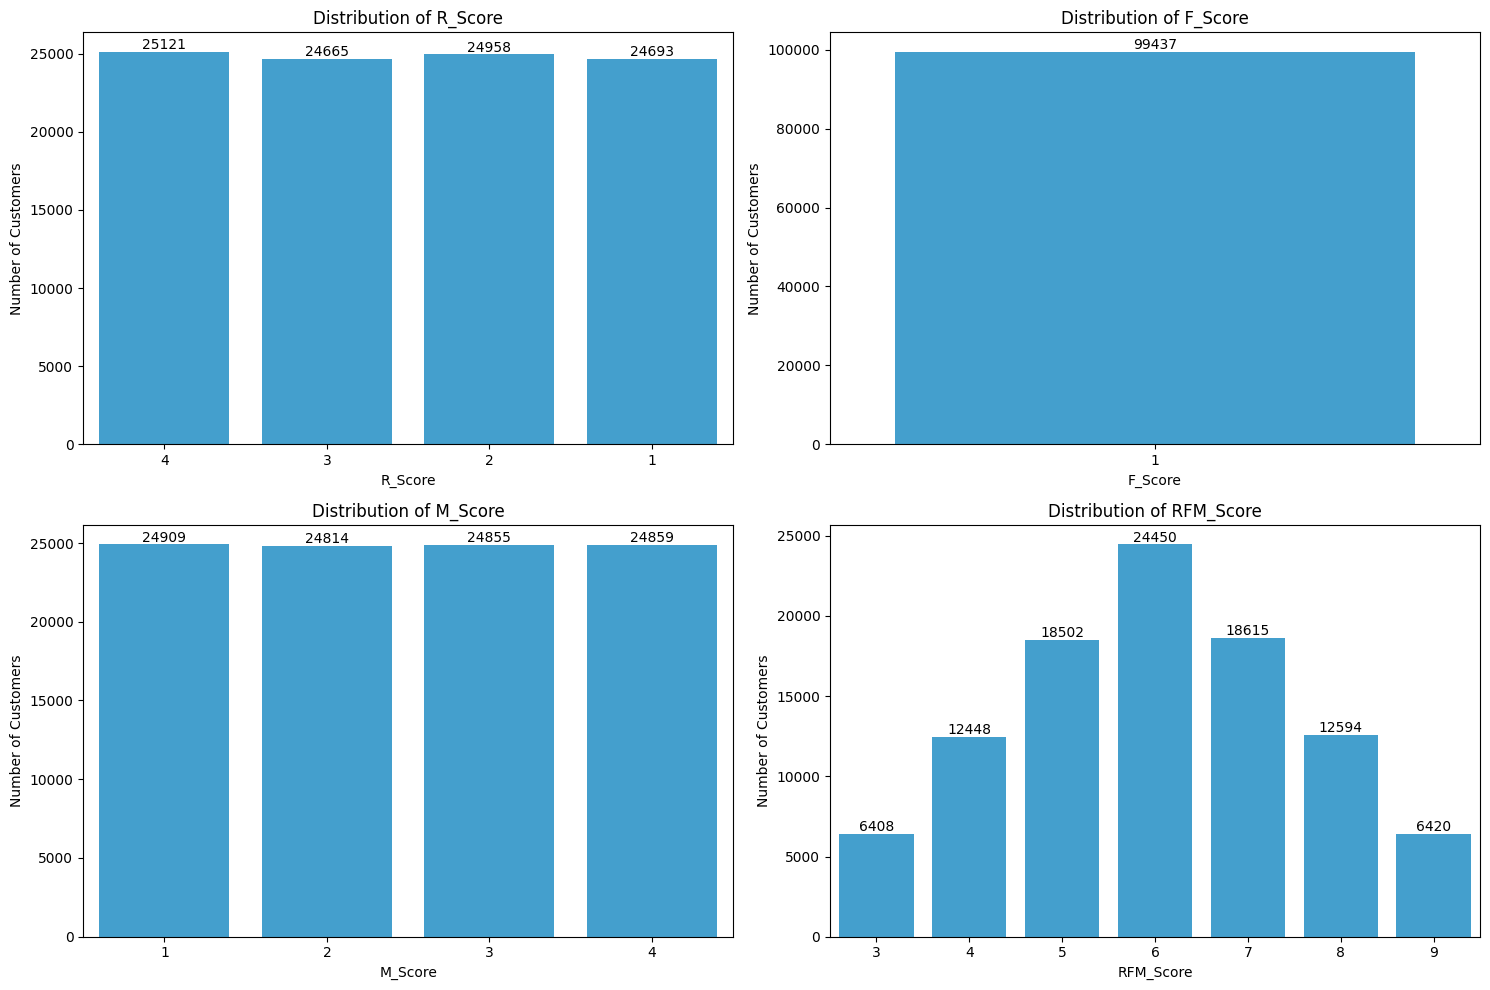

In [32]:
# Visualize the distribution of scores
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot for R_Score
sns.countplot(data=rfm_df, x='R_Score', ax=axs[0, 0], color='#2DA7E4')
axs[0, 0].set_title('Distribution of R_Score')
axs[0, 0].set_ylabel('Number of Customers')
for p in axs[0, 0].patches:
    axs[0, 0].annotate(f'{p.get_height():.0f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 5), 
                       textcoords='offset points')

# Plot for F_Score
sns.countplot(data=rfm_df, x='F_Score', ax=axs[0, 1], color='#2DA7E4')
axs[0, 1].set_title('Distribution of F_Score')
axs[0, 1].set_ylabel('Number of Customers')
for p in axs[0, 1].patches:
    axs[0, 1].annotate(f'{p.get_height():.0f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 5), 
                       textcoords='offset points')

# Plot for M_Score
sns.countplot(data=rfm_df, x='M_Score', ax=axs[1, 0], color='#2DA7E4')
axs[1, 0].set_title('Distribution of M_Score')
axs[1, 0].set_ylabel('Number of Customers')
for p in axs[1, 0].patches:
    axs[1, 0].annotate(f'{p.get_height():.0f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 5), 
                       textcoords='offset points')

# Plot for RFM_Score
sns.countplot(data=rfm_df, x='RFM_Score', ax=axs[1, 1], color='#2DA7E4')
axs[1, 1].set_title('Distribution of RFM_Score')
axs[1, 1].set_ylabel('Number of Customers')
for p in axs[1, 1].patches:
    axs[1, 1].annotate(f'{p.get_height():.0f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 5), 
                       textcoords='offset points')

plt.tight_layout()
plt.show()

Hasil dari RFM *Analysis* menunjukkan:

* **Recency_Score (R_Score)**: Skor yang diberikan berdasarkan seberapa baru pembelian terakhir pelanggan. Skor 4 menunjukkan pembelian paling baru (sebagai tanda bahwa pelanggan tersebut masih aktif), sedangkan skor 1 menunjukkan sudah lama sejak pelanggan terakhir kali membeli, yang ada kemungkinan menunjukkan risiko *churn*.

* **Frequency_Score (F_Score)**: Skor yang diberikan berdasarkan seberapa sering pelanggan melakukan pembelian. Skor 4 menunjukkan frekuensi pembelian (sering beli) paling tinggi selama periode waktu tertentu, sedangkan skor 1 menunjukkan pelanggan yang jarang membeli. Nilai *Frequency* yang tinggi menunjukkan pelanggan sering membeli, yang menunjukkan loyalitas dan keterlibatan yang tinggi.

    **Frequency** dan **Recency** memiliki makna/maksud yang berbeda, untuk memahami dengan mudah, saya memiliki contoh seperti di bawah:

    * Seorang pelanggan mungkin baru saja melakukan pembelian (*Recency* rendah) tetapi hanya membeli sekali atau dua kali selama satu tahun terakhir (*Frequency* rendah).

    * Sebaliknya, pelanggan lain mungkin membeli setiap bulan selama satu tahun terakhir (*Frequency* tinggi) tetapi belum membeli apa-apa dalam dua bulan terakhir (*Recency* tinggi).

* **Monetary_Score (M_Score)**: Skor yang diberikan berdasarkan total jumlah uang yang dihabiskan oleh pelanggan. Skor 4 menunjukkan jumlah pengeluaran paling tinggi, sedangkan skor 1 menunjukkan jumlah pengeluaran paling rendah.

* **RFM_Group**: Gabungan dari ketiga skor di atas untuk menentukan segmen pelanggan.

* **RFM_Score**: Penjumlahan dari ketiga skor untuk mendapatkan skor RFM keseluruhan.

* *Insight* yang bisa didapat dari **RFM_Score** adalah mengenai segmentasi masing-masing pelanggan/*customer*, yaitu seperti pelanggan yang paling loyal, pelanggan yang masih aktif, dan pelanggan yang menghabiskan paling banyak uang di *e-commerce*. Dari *bar chart* di atas, dapat diketahui seberapa banyak *customer* dengan **RFM_Score**, **R_Score**, **F_Score**, dan **M_Score** yang tertinggi, sedang, dan juga terendah.

* **RFM_Score** 9 menunjukkan bahwa *customer* tersebut berarti memiliki **F_Score** 1 (menunjukkan *customer* tidak sering melakukan pembelian), lalu **R_Score** 4 (menunjukkan *customer* dengan pembelian paling baru/*customer* masih aktif), dan **M_Score** 4 (menunjukkan *customer* yang paling banyak menghabiskan uang di *e-commerce*).

* Begitu juga dengan **RFM_Score** yang lainnya, misalkan **RFM_Score** 8 yang mana di sini ada 2 kemungkinan:

    1. **F_Score** = 1, **M_Score** = 4, dan **R_Score** = 3

    2. **F_Score** = 1, **M_Score** = 3, dan **R_Score** = 4

## ***INSIGHT***, **KESIMPULAN**, **SARAN**

### *Insight*

1. **Dominasi Sao Paulo**: Sao Paulo (**SP**) adalah pusat aktivitas *e-commerce*, dengan sebagian besar pelanggan dan penjual berada di sana. Ini menunjukkan pentingnya fokus pada pasar di Sao Paulo untuk pertumbuhan lebih lanjut.

2. **Ulasan Produk**: Beberapa kategori produk memiliki persentase ulasan negatif yang tinggi. Mengidentifikasi masalah dengan produk-produk tersebut dapat membantu meningkatkan kepuasan pelanggan.

### Kesimpulan

1. **Profil Pelanggan**:
   * Mayoritas pelanggan berasal dari negara bagian Sao Paulo (**SP**), Rio de Janeiro (**RJ**), dan Minas Gerais (**MG**).

   * Sebagian besar ulasan pelanggan positif, dengan total sekitar 77% ulasan adalah skor 4 dan skor 5.

2. **Profil Produk**:
   * Kategori produk dengan ulasan positif tertinggi adalah **cds_dvds_musicals**, **construcao_ferramentas_ferramentas**, dan **livros_interesse_geral**.

   * Kategori produk dengan ulasan negatif tertinggi adalah **seguros_e_servicos**, **pc_gamer**, dan **portateis_cozinha_e_preparadores_de_alimentos**.
   
3. **Tren Penjualan**:
   * Terdapat pertumbuhan yang konsisten dalam penjualan dari November 2016 hingga akhir 2017, dengan puncaknya pada November 2017.

   * Penjualan menurun sedikit pada awal 2018 tetapi kemudian stabil.

### Saran

1. **Peningkatan Produk**: Untuk kategori produk dengan ulasan negatif yang tinggi, sebaiknya dilakukan investigasi lebih lanjut untuk mengidentifikasi masalah dan memperbaikinya.

2. **Promosi Berfokus**: Mengingat dominasi Sao Paulo dalam *e-commerce*, pertimbangkan untuk meluncurkan promosi atau kampanye khusus yang ditargetkan untuk pasar Sao Paulo.

3. **Program Loyalitas**: Untuk pelanggan dengan nilai RFM yang tinggi, pertimbangkan untuk meluncurkan program loyalitas atau memberikan insentif khusus untuk mendorong pembelian lebih lanjut.

4. **Kampanye Pemasaran yang Ditargetkan**: Gunakan segmentasi RFM untuk menjalankan kampanye pemasaran yang ditargetkan. Misalnya, tawarkan diskon khusus untuk pelanggan dengan nilai RFM yang paling rendah untuk mendorong mereka kembali berbelanja.